In [51]:
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
mpl.rcParams['figure.dpi'] = 500
plt.rcParams['figure.figsize'] = (12, 6)

In [11]:
dataset = pd.read_csv('../input/countrycsv/country.csv')
info = pd.read_csv('../input/countrycsv/countryDictionary.csv')
x = dataset.iloc[:,1:10].values
countries = dataset.iloc[:,[0]].values #list of all countries

In [12]:
dataset.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


# Performing Standardisation on the matrix of features x

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

# Using the elbow method to find the optimal number of clusters

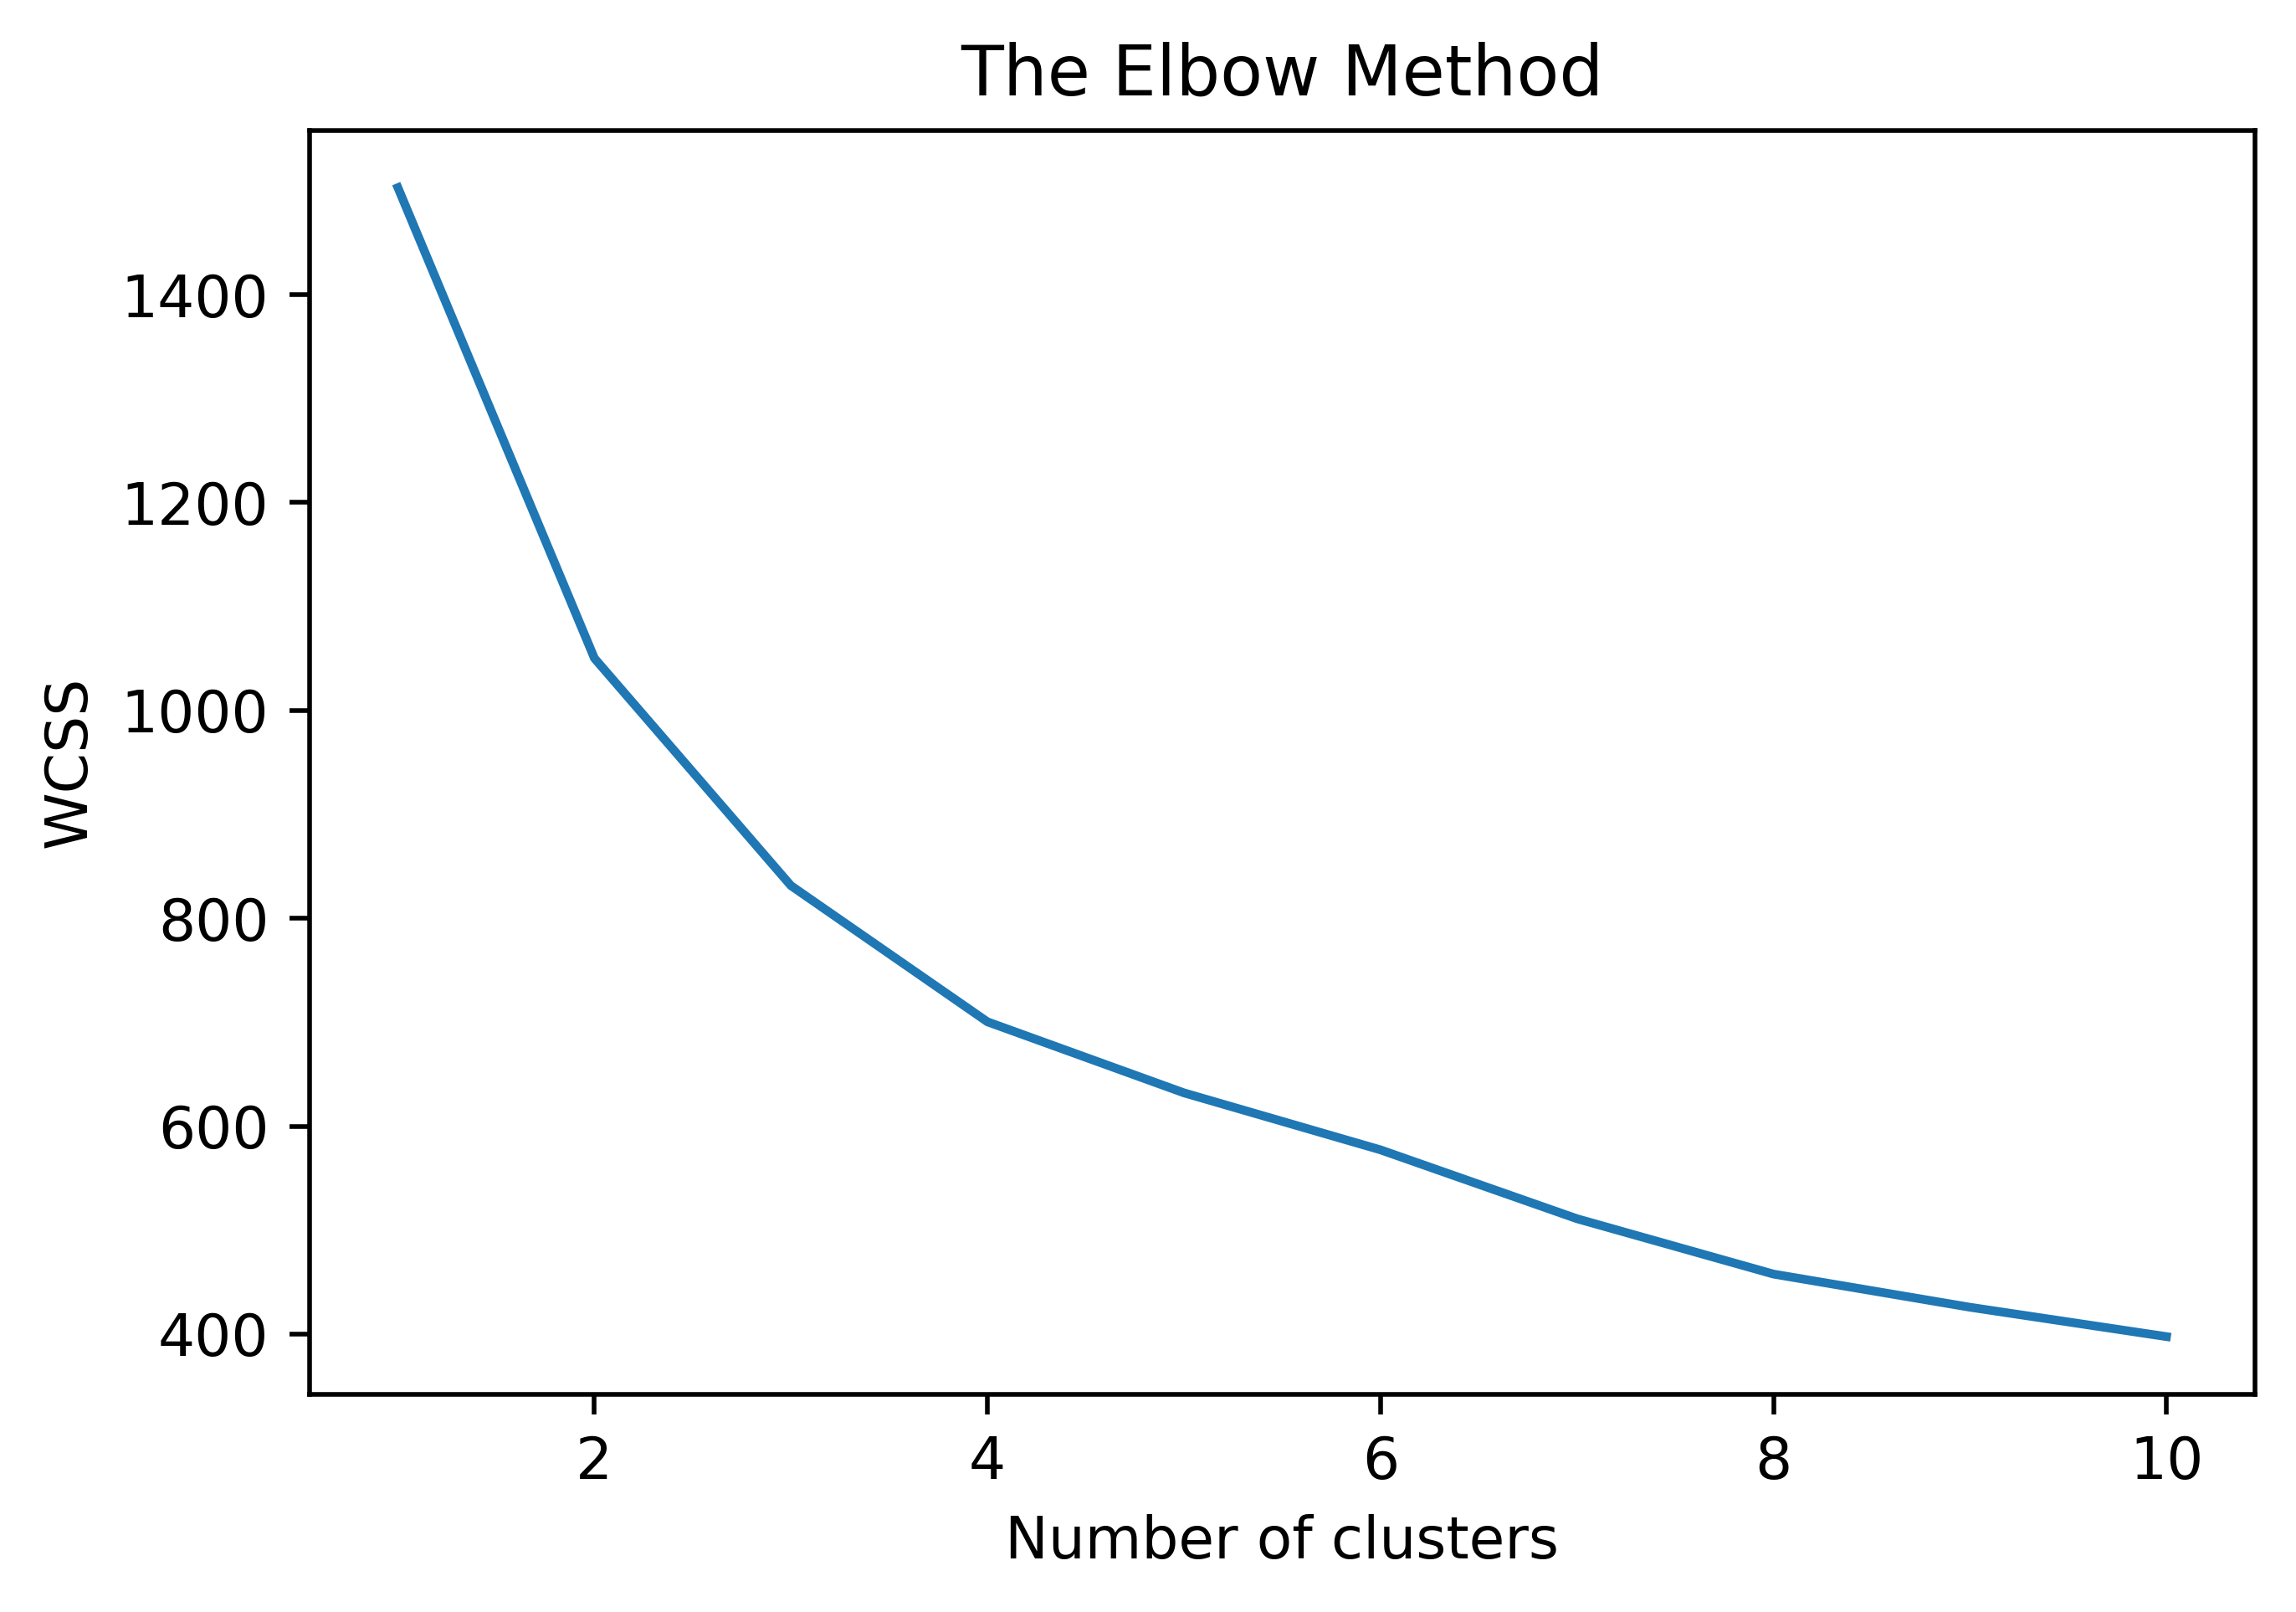

<Figure size 3000x2000 with 0 Axes>

In [14]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
plt.savefig('Elbow Method',dpi = 500)


From the Elbow Method , we see that 3 or 4 could be the optimum number of clusters , however let us also create a Dendrogram for further analysis

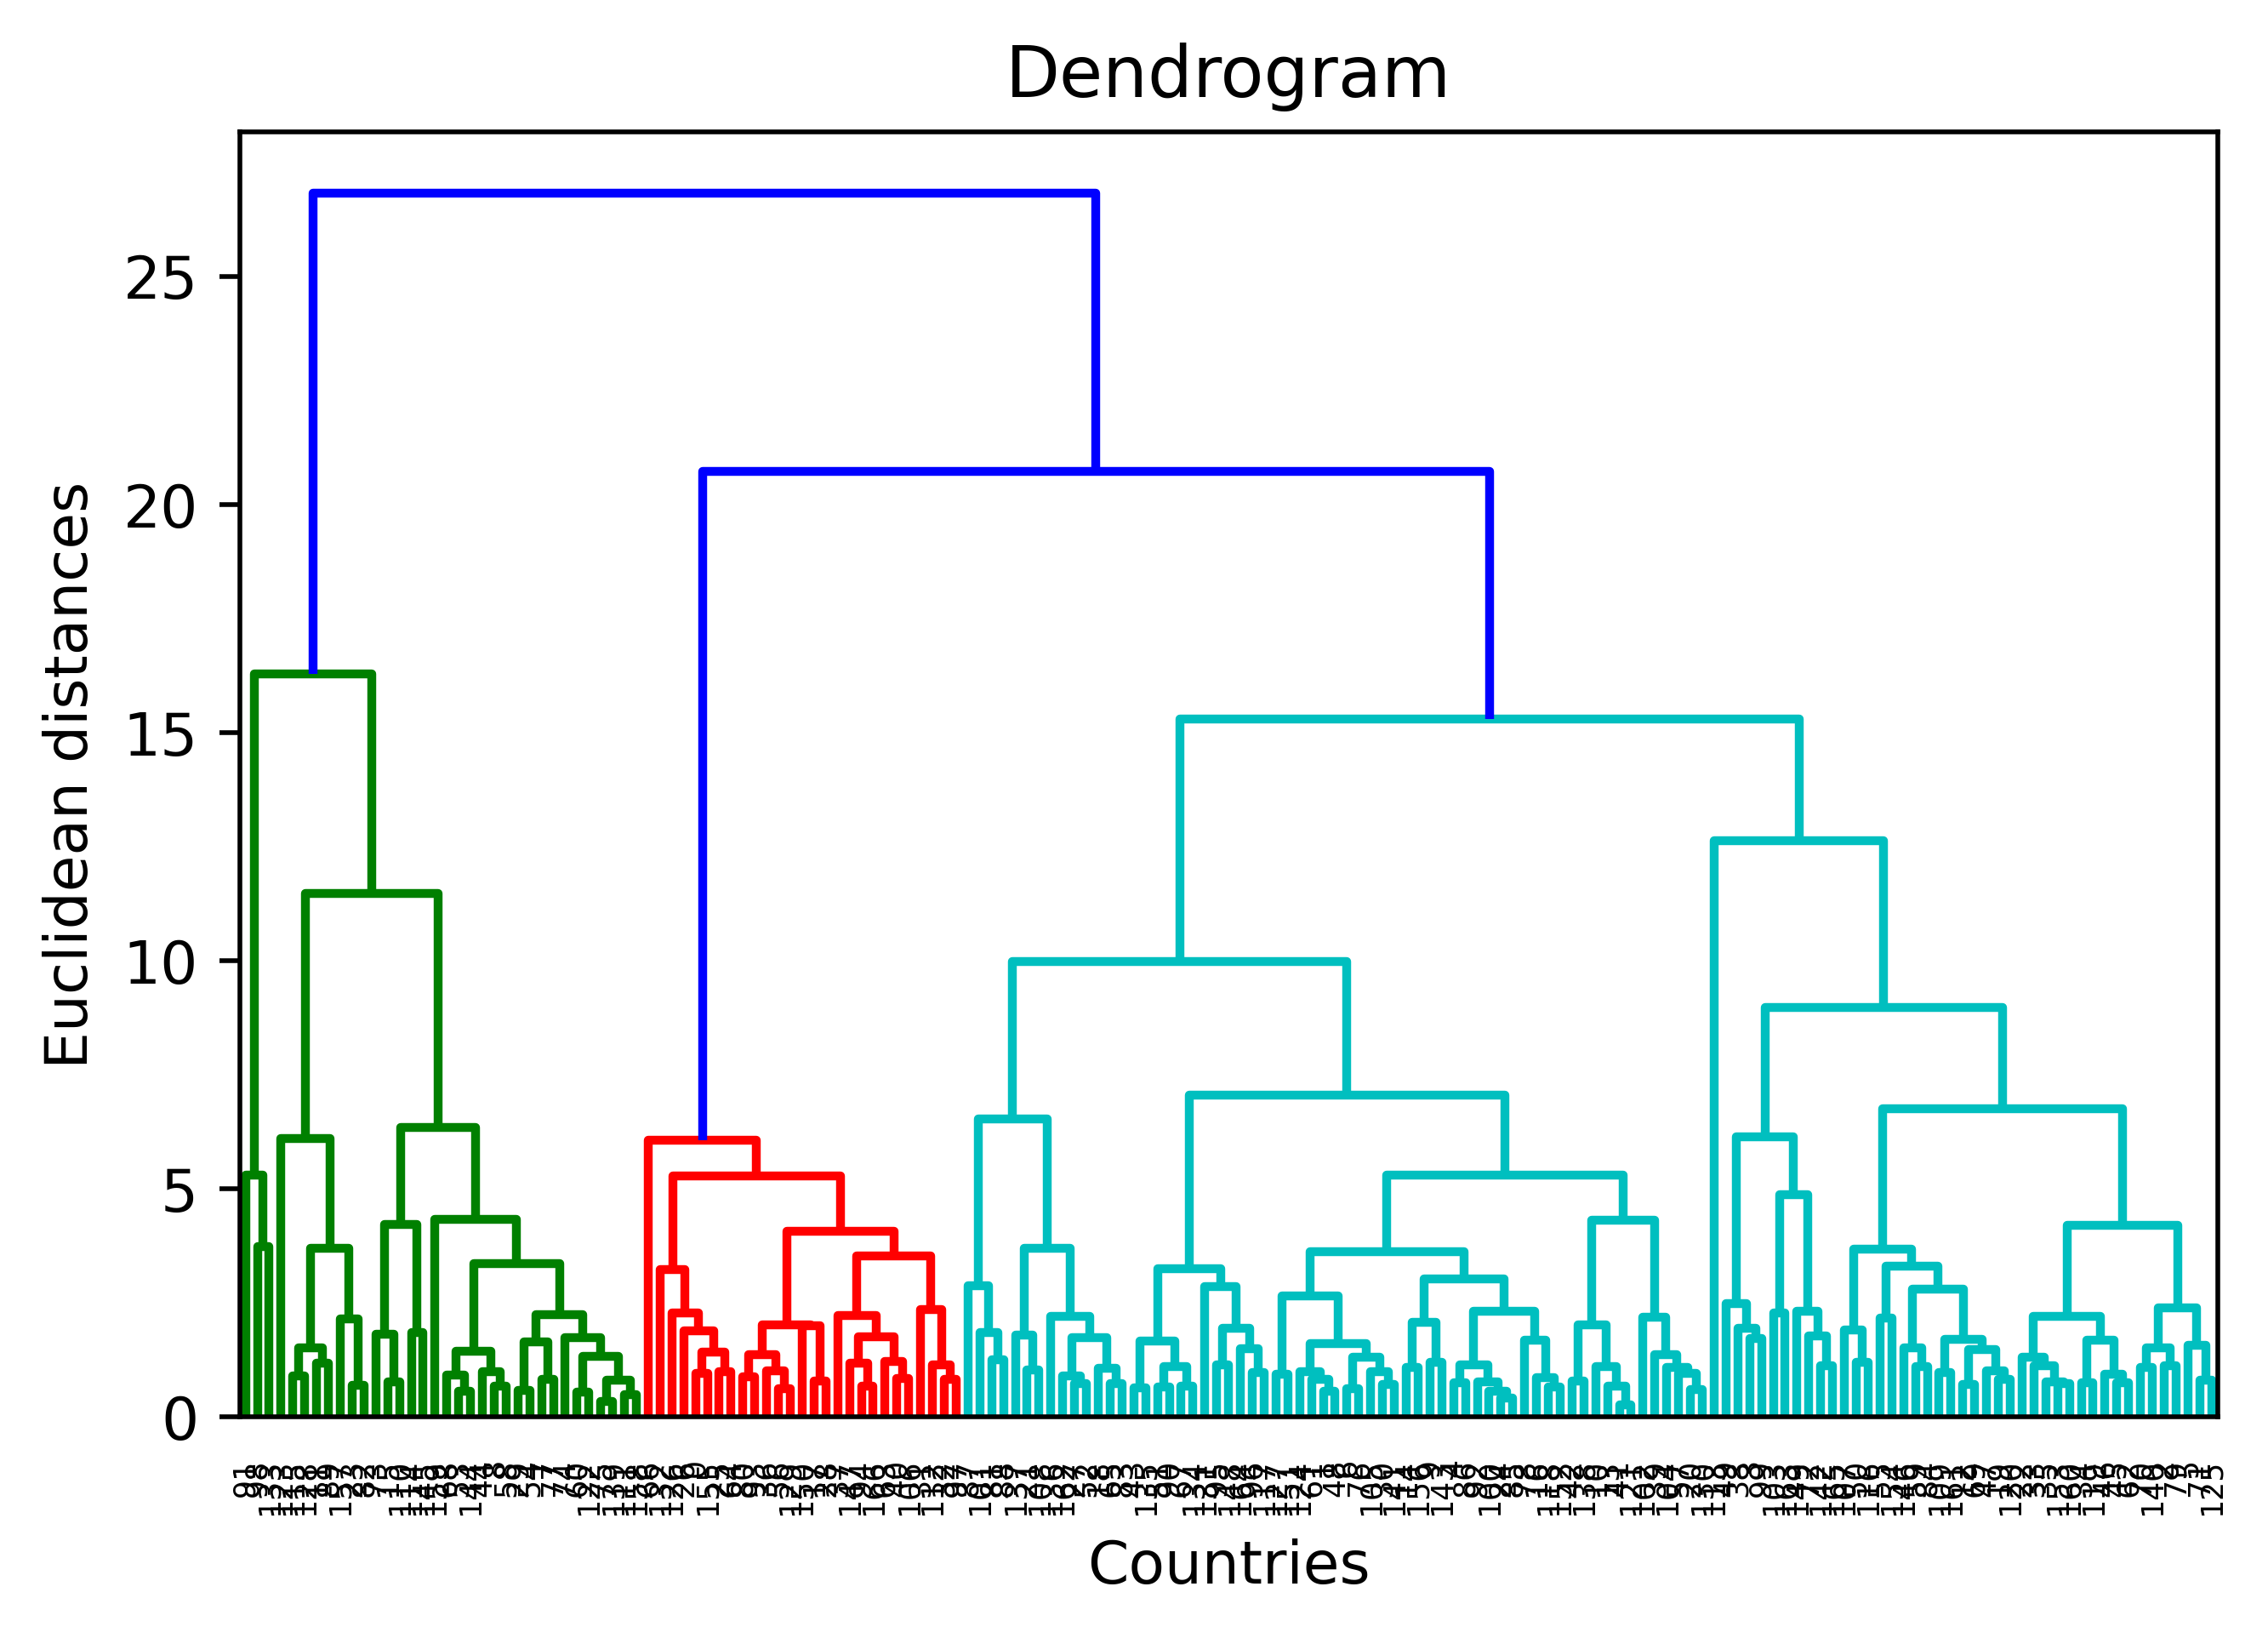

In [15]:
# Creating dendograms using wards method 
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Countries')
plt.ylabel('Euclidean distances')
plt.savefig('Dendrogram',dpi = 500)
plt.show()

The Dendrogram provides us with more insight on the number of clusters , we can see that the ideal number of clusters should be 3

Applying Kmeans Algorithm to form clusters

In [19]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)
kmeans.fit(x)
y = kmeans.predict(x)
print(y)

[1 2 2 1 2 2 2 0 0 2 2 0 2 2 2 0 2 1 2 2 2 1 2 0 2 1 1 2 1 0 2 1 1 2 2 2 1
 1 1 2 1 2 0 0 0 2 2 2 2 1 1 2 2 0 0 1 1 2 0 1 0 2 2 1 1 2 1 2 0 2 2 2 1 0
 0 0 2 0 2 2 1 1 0 2 1 2 2 1 1 2 2 0 2 1 1 2 2 1 0 1 2 2 2 2 2 2 1 2 1 2 0
 0 1 1 0 2 1 2 2 2 2 2 0 0 2 2 1 2 2 1 2 2 1 0 0 0 2 1 0 0 2 2 1 2 0 0 2 1
 2 1 1 2 2 2 2 1 2 0 0 0 2 2 2 2 2 1 1]


Creating a list of names of features 

In [36]:
temp = info.iloc[1:10,[0]].values
features = []
for val in temp:
        inp = str(val)
        inp = inp.replace('[','')
        inp = inp.replace(']','')
        inp = inp.replace("'",'')
        features.append(inp)
print(features)

['child_mort', 'exports', 'health', 'imports', 'Income', 'Inflation', 'life_expec', 'total_fer', 'gdpp']


In order to understand the significance of each feature we shall plot graphs for them and understand the significance of each cluster 

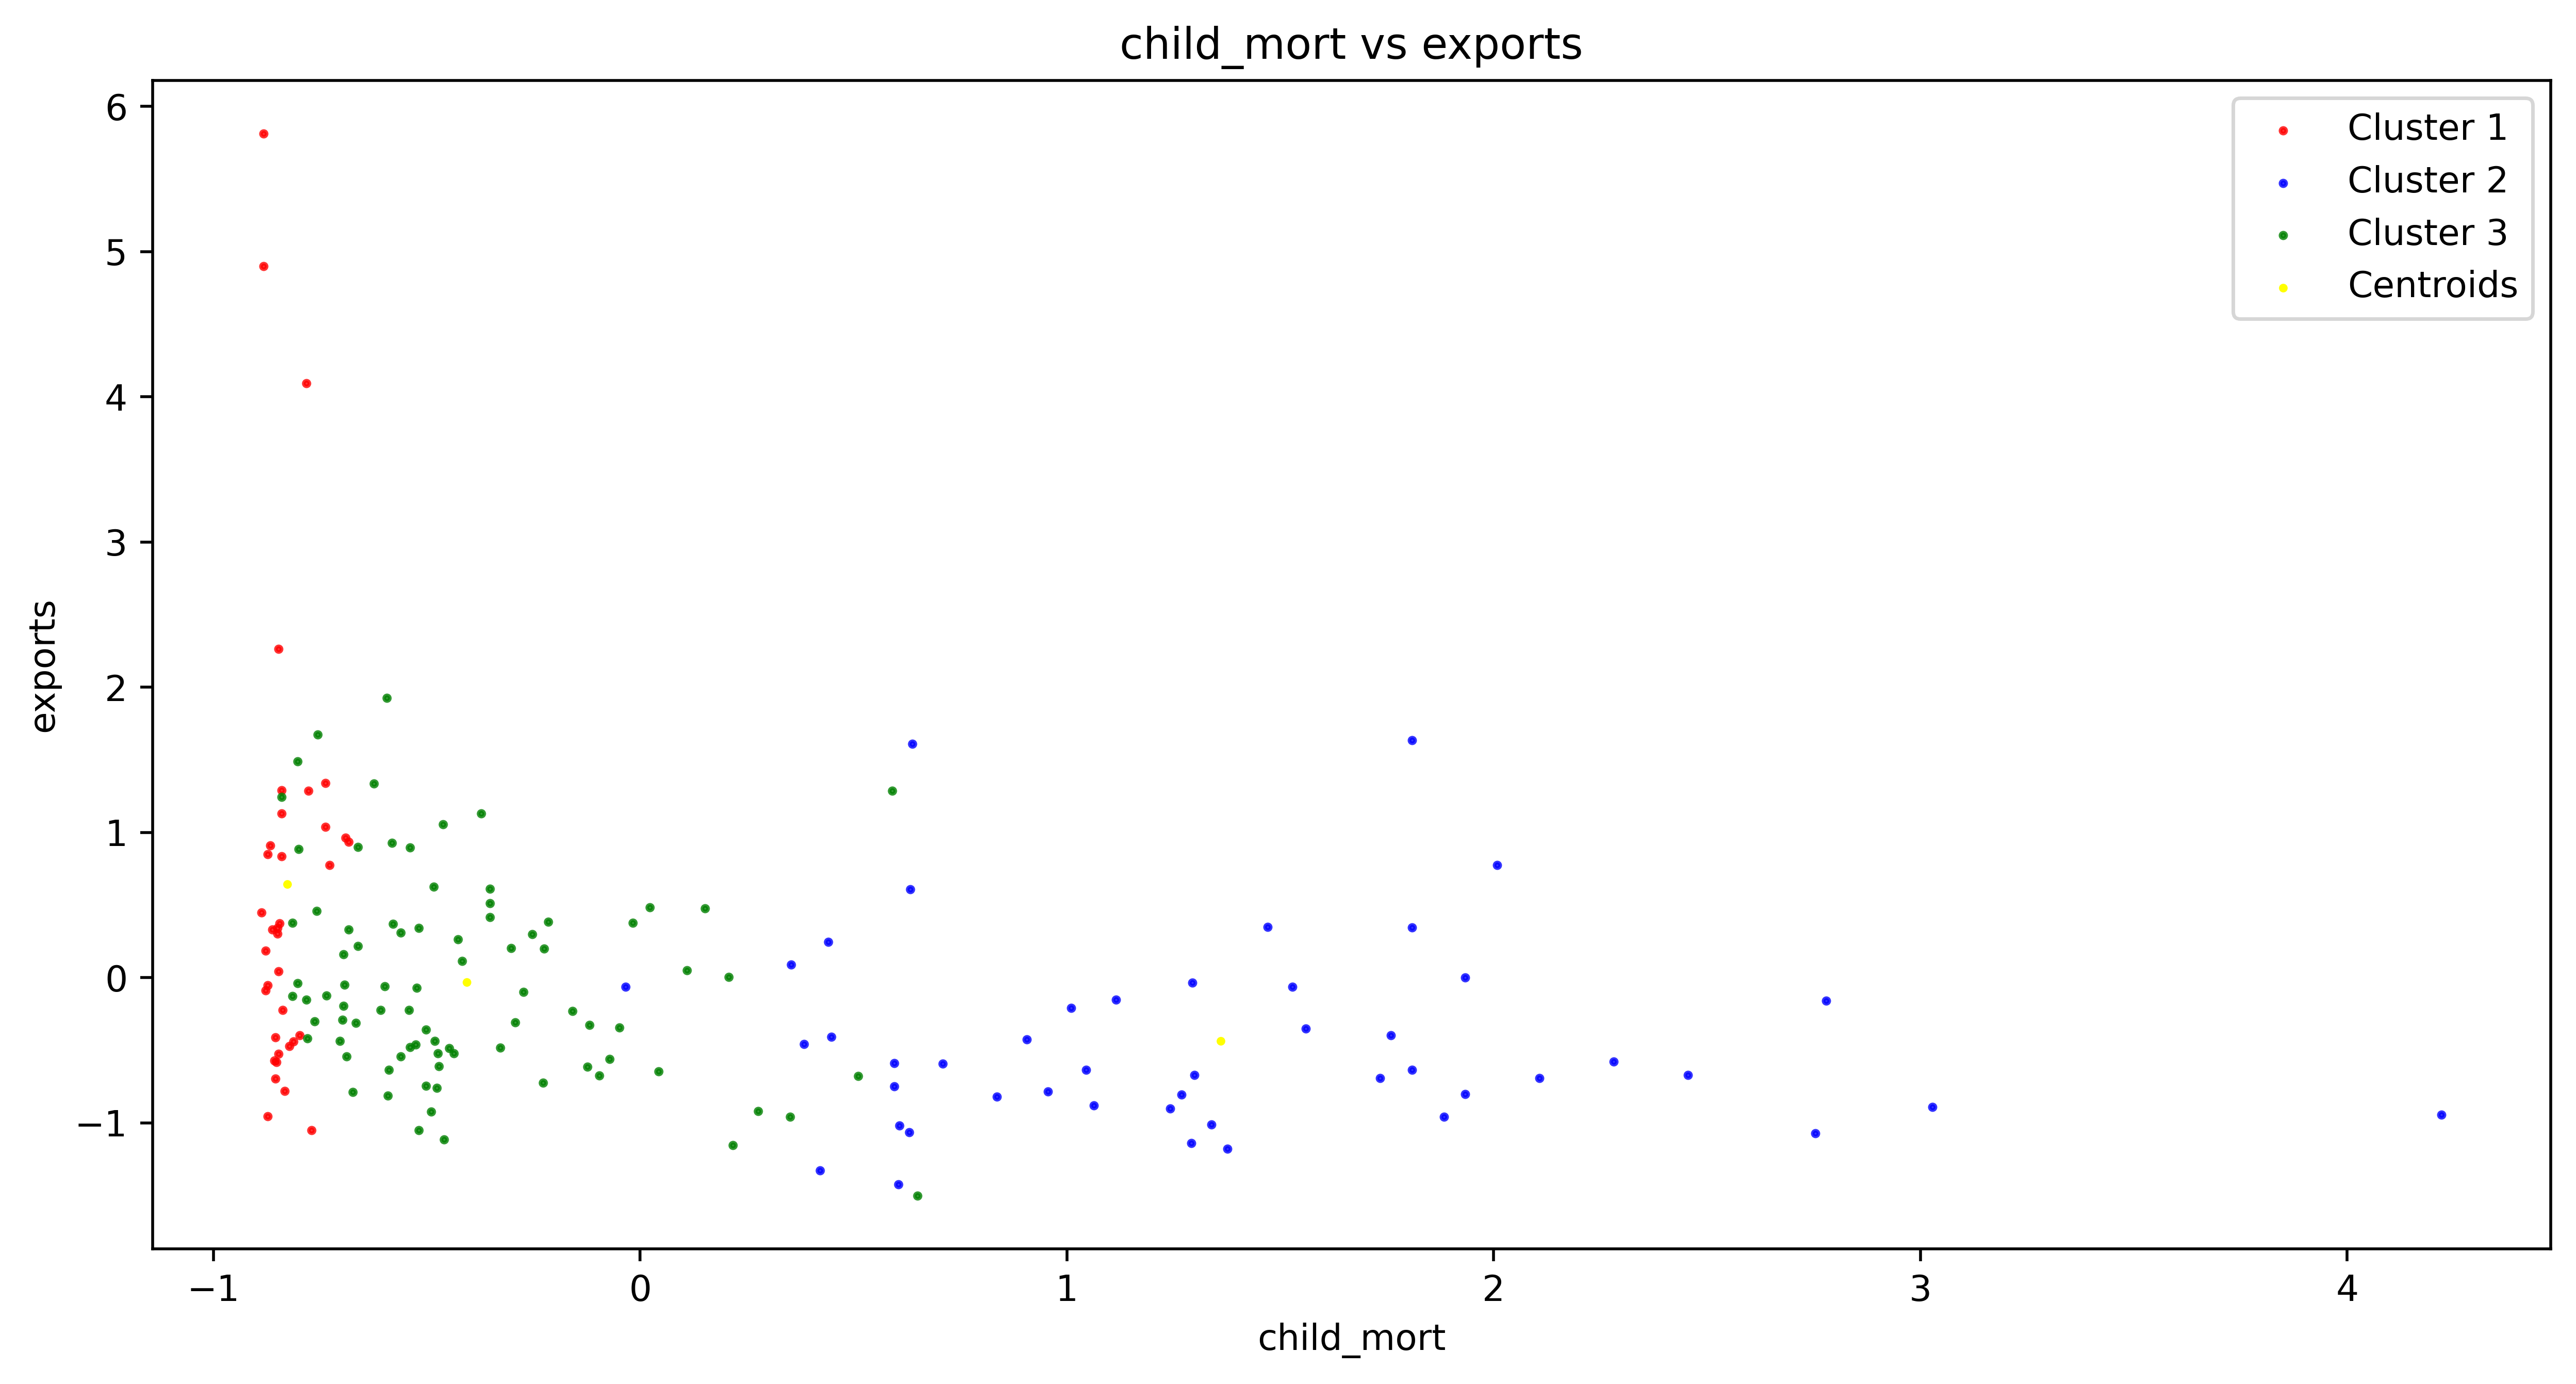

In [52]:
def plotAll(y,features,x):
    for i in range(0,9):
        for j in range(i+1,9):
            plt.scatter(x[y == 0, i], x[y == 0, j], s = 2.5, c = 'red', label = 'Cluster 1',alpha=.8)
            plt.scatter(x[y == 1, i], x[y == 1, j], s = 2.5, c = 'blue', label = 'Cluster 2',alpha = .8)
            plt.scatter(x[y == 2, i], x[y == 2, j], s = 2.5, c = 'green', label = 'Cluster 3',alpha = .8)
            plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 2, c = 'yellow', label = 'Centroids')
            xtit = str(features[i])
            ytit = str(features[j])
            plt.title(xtit + ' vs ' + ytit)
            plt.xlabel(xtit)
            plt.ylabel(ytit)
            plt.legend()
            plt.savefig(xtit + ' vs ' + ytit,dpi =  500)
            plt.show()
plotAll(y,features,x)